In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_accuracy = np.load("./accuracies.npy")
train_loss = np.load("./losses.npy")
val_accuracy = np.load("./val_accuracies.npy")
val_loss = np.load("./val_losses.npy")


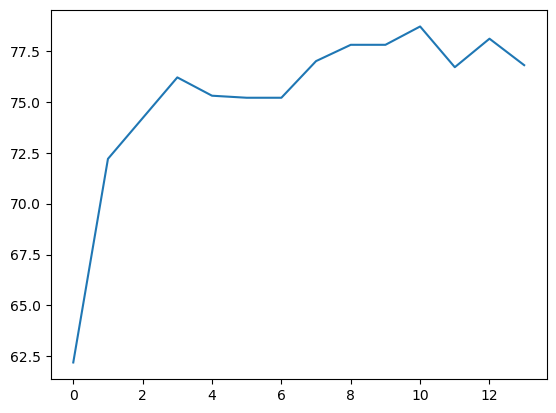

In [3]:
plt.plot(train_accuracy)


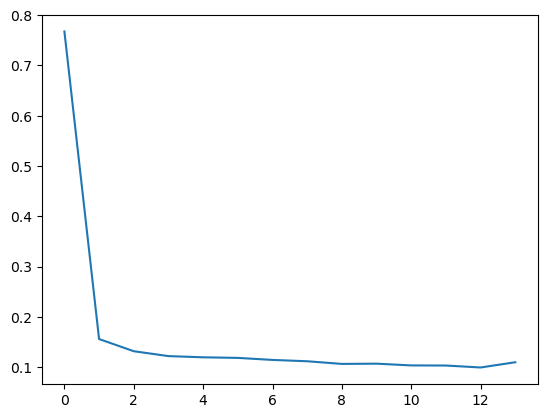

In [4]:
plt.plot(train_loss)


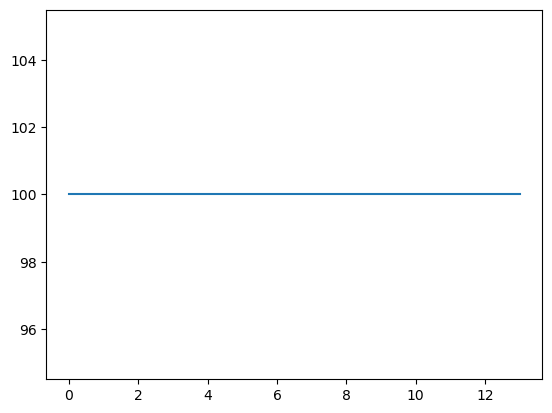

In [5]:
plt.plot(val_accuracy)


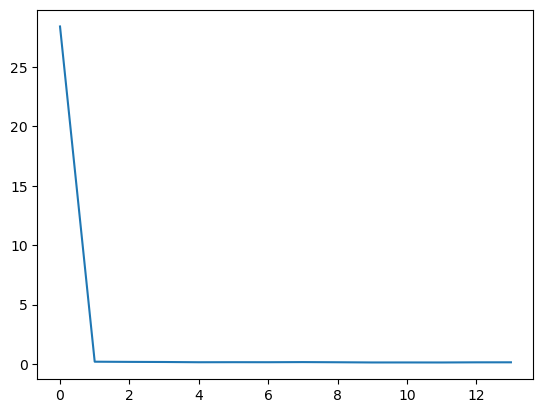

In [6]:
plt.plot(val_loss)

In [ ]:

from torchvision.models.segmentation import fcn_resnet50
from train import load_images, load_labels, project_out
import torch
from PIL import Image
from utils import id_to_rgb

model = fcn_resnet50(num_classes=19)
model.load_state_dict(torch.load("./models/model_epoch_13.pth"))
model.to("cuda")
model.eval()

paths = [
    "lindau_000000_000019.png",
    "lindau_000001_000019.png",
    "munster_000011_000019.png",
    "frankfurt_000000_008451.png"
]

images = load_images(paths, validation=True)

with torch.no_grad():
    images = project_out(model(images)["out"].cpu().detach().numpy())

for i in range(len(images)):
    print(images[i])
    predict = Image.fromarray(images[i])
    actual = Image.open(f"./data2/val/labels/{paths[i]}")
    image = Image.open(f"./data2/val/img/{paths[i]}")
    predict.convert("L").save(f"example_{i}_predicted.png")
    actual.convert("L").save(f"example_{i}_actual.png")
    image.save(f"example_{i}_image.png")

    predict = Image.fromarray(id_to_rgb(np.array(predict)).astype(np.uint8), "RGB")
    actual = Image.fromarray(id_to_rgb(np.array(actual)).astype(np.uint8), "RGB")
    predict.convert("RGB").save(f"example_{i}_predicted_rgb.png")
    actual.convert("RGB").save(f"example_{i}_actual_rgb.png")
